In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import seaborn as sns

In [38]:
song_data = []
with gzip.open('data/unique_tracks.txt.gz', mode='rt') as f:
    for row in f:
        row = row.strip()
        fields = row.split('<SEP>')
        song_data.append(fields)
song_df = pd.DataFrame(song_data, columns=['track_id', 'song_id', 'artist', 'title'])
song_df.head()

,track_id,song_id,artist,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [42]:
df = pd.read_csv('data/selected_triplet.csv')
df.columns = ['user_id', 'song_id', 'weight']
df.head()

,user_id,song_id,weight
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEGVZY12A58A7857E,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEKWEA12A6D4F5DC3,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEOBYG12A6D4F8AE2,1


In [43]:
grouped_df = df.groupby('song_id').sum().reset_index()
merged_df = grouped_df.merge(song_df, on='song_id', how='left')
merged_df.head()

,song_id,weight,track_id,artist,title
0,SOAAADD12AB018A9DD,19,TRNCENP12903C9EF3A,Harold Budd,The Room Of Stairs
1,SOAAADE12A6D4F80CC,2,TRSKKFK128F148B615,Dave Edmunds,(I'm Gonna Start) Living Again If It Kills Me ...
2,SOAAADF12A8C13DF62,6,TRCQMSP128F428A6F7,LANDA DANIEL,KRYSAR (LIVE)
3,SOAAADZ12A8C1334FB,5,TRMDNZY128F425A532,Paul Cardall,Joy To The World
4,SOAAAFI12A6D4F9C66,95,TRZEXLQ128F1491D17,I Love You But I've Chosen Darkness,The Less You See


In [46]:
merged_df.sort_values('weight', ascending=False).head(15)

,song_id,weight,track_id,artist,title
38268,SODGGWN12A8C1366B5,3970,TRWUHJV128F425315B,The Members,Working Girl
157300,SONSTND12AB018516E,2963,TREORMB12903CBCFFE,Jason Falkner,I Go Astray (LP Version)
80040,SOGVKZV12A8C143863,2792,TRZZLCS128F92C6124,The Afghan Whigs,I Keeping Coming Back
122944,SOKPSCO12A58A7F0DF,2249,TRVIFBN128F9305CDD,RUN-DMC,Soul To Rock And Roll
63925,SOFKVPB12A58A7EE65,2056,TRMONLN128F4219024,Bobbi Humphrey,Chicago_ Damn
66901,SOFRRFT12A8C140C5C,2009,TREESKC128F92C5A00,Jack the Ripper,Words
226998,SOUJJUJ12A6D4F93BB,1949,TRDNXNU128F14A515D,Adrian Hood,Brown Eyed Blues
158304,SONVEPW12A8C140D80,1923,TRSHWSE128F429E7DF,Brasilian Tropical Orchestra,Dindi
217628,SOTLVSV12A8C136E8D,1909,TRBSBLT128F428653B,Xavier Rudd,Shiver
281975,SOZVPPQ12A8C13F7A8,1899,TRFNPEY128F428CFB5,The Ronettes,Silhouettes


#### Songs

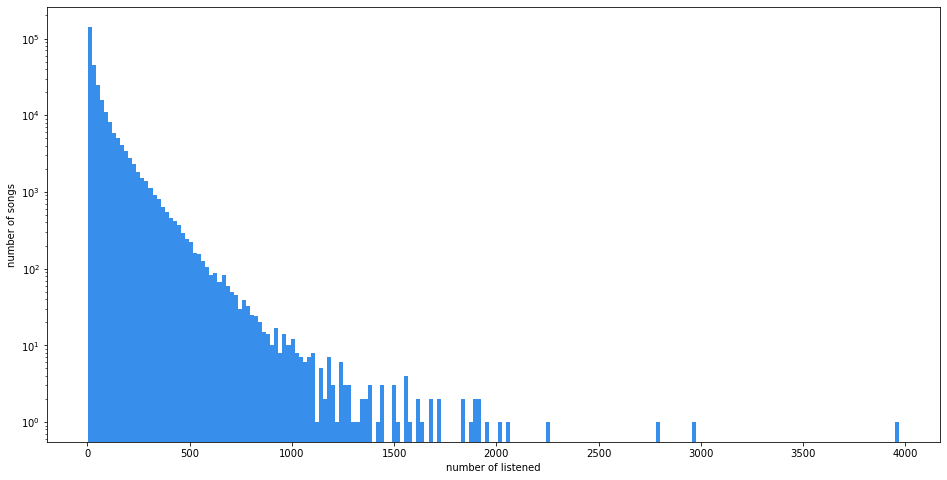

In [71]:
fig = plt.figure(figsize=(16,8))
sns.distplot(merged_df['weight'].tolist(), bins=200, kde=False, rug=False, \
             hist_kws={"linewidth":3,"alpha":1,"color": "#388eeb"})
plt.yscale('log')
plt.xlabel('number of listened')
plt.ylabel('number of songs')
plt.show()

#### Users

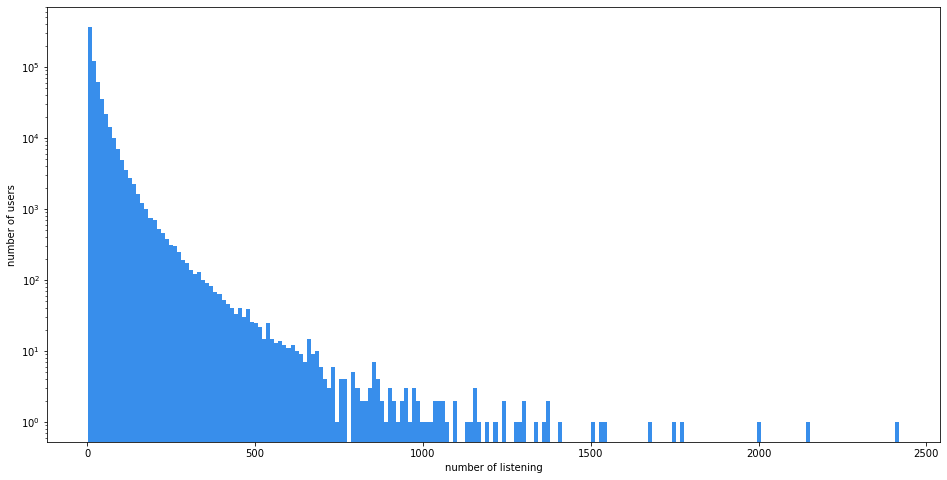

In [72]:
grouped_df = df.groupby('user_id').sum().reset_index()
fig = plt.figure(figsize=(16,8))
sns.distplot(grouped_df['weight'].tolist(), bins=200, kde=False, rug=False, \
             hist_kws={"linewidth":3,"alpha":1,"color": "#388eeb"})
plt.yscale('log')
plt.xlabel('number of listening')
plt.ylabel('number of users')
plt.show()

### Full Dataset

In [5]:
df = pd.read_csv('data/selected_triplet_full_dataset.csv')
df.head()

,user,song,weight
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [6]:
df.shape

(48373586, 3)

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.distplot(merged_df['weight'].tolist(), bins=200, kde=False, rug=False, \
             hist_kws={"linewidth":3,"alpha":1,"color": "#388eeb"})
plt.yscale('log')
plt.xlabel('number of listened')
plt.ylabel('number of users')
plt.show()

### User

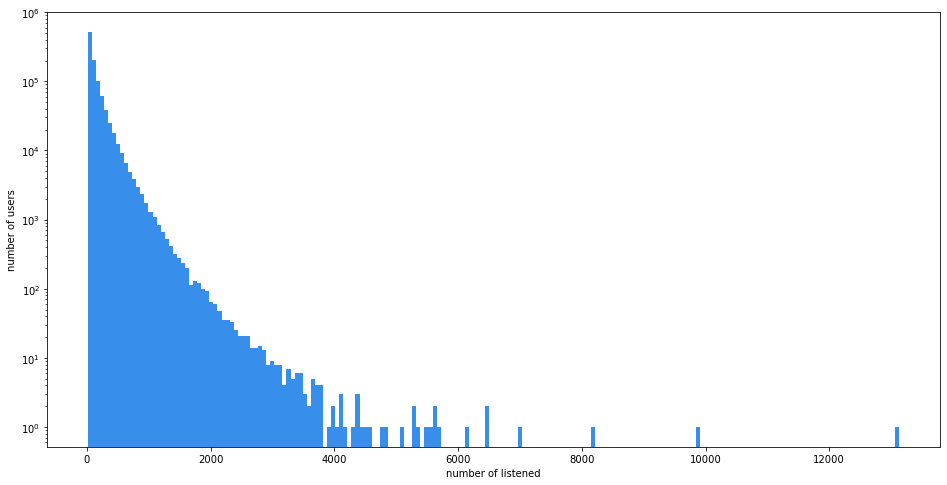

In [10]:
user_df = df.groupby('user').sum().reset_index()

fig = plt.figure(figsize=(16,8))
sns.distplot(user_df['weight'].tolist(), bins=200, kde=False, rug=False, \
             hist_kws={"linewidth":3,"alpha":1,"color": "#388eeb"})
plt.yscale('log')
plt.xlabel('number of listened')
plt.ylabel('number of users')
plt.show()


### Song

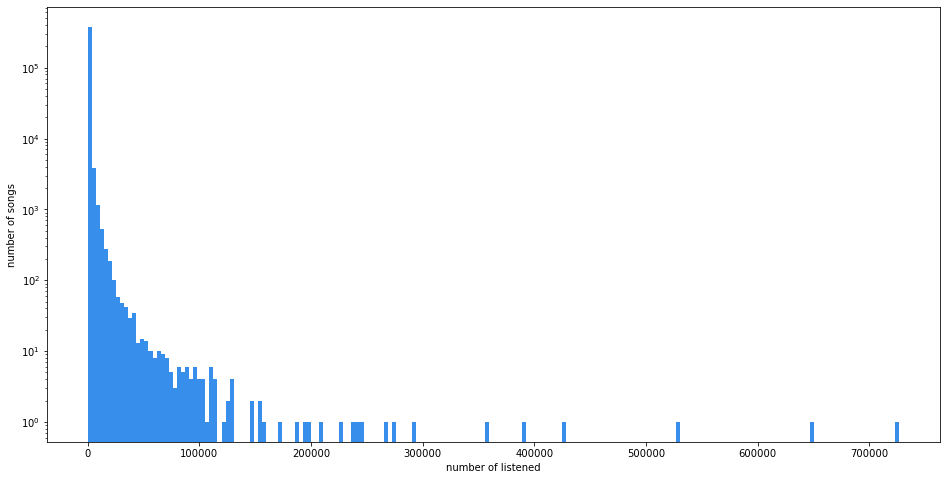

In [9]:
song_df = df.groupby('song').sum().reset_index()

fig = plt.figure(figsize=(16,8))
sns.distplot(song_df['weight'].tolist(), bins=200, kde=False, rug=False, \
             hist_kws={"linewidth":3,"alpha":1,"color": "#388eeb"})
plt.yscale('log')
plt.xlabel('number of listened')
plt.ylabel('number of songs')
plt.show()
